In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from UliEngineering.EngineerIO import format_value
from si_prefix import si_format
import plecs_helper as helper
%matplotlib
%matplotlib inline

Using matplotlib backend: TkAgg


# Lab 3 Report
## Ian Eykamp
Lab group: Ian Eykamp, Lauren Xiong, Melissa Kazazic

## Initial Testing
Our PCB worked correctly on all start-up tests. We took one sweep of the gate voltage on the MOSFET (Vg) when the potentiometer was fully to the right (maximizing V_COMP). As expected, the gate voltage followed a square wave with a 50% duty cycle, which is the maximum duty cycle for the UC2844.

running helper


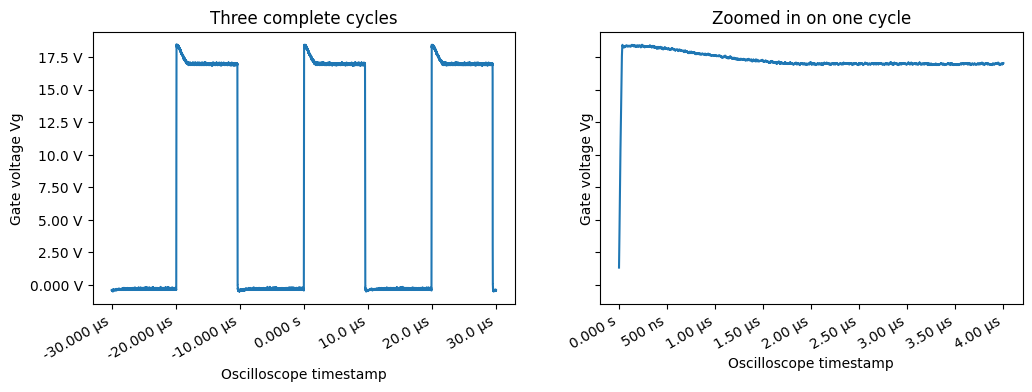

In [30]:
(df, tspan, tstep) = helper.read_rigol_csv("Initial_power_on.csv", ch1 = "Vg")
df_envelope = df
df_zoom = df[(df["t"] > 0) & (df["t"] < 4e-6)]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Gate voltage Vg", "V", title = "Three complete cycles", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vg"], label = "Vg")

ax2.plot(df_zoom["t"], df_zoom["Vg"], label = "Vg")
helper.axes_labels("Oscilloscope timestamp", "s", "Gate voltage Vg", "V", title = "Zoomed in on one cycle", ax = ax2)

There is an unexpected peak in the gate voltage at the start of each on cycle. A close examination reveals a linear ramp down from the peak gate voltage of 18V down to about 17V over the course of 1.5us. There does not appear to be any ripple during this transition. A possible explanation for this behavior is the capacitance of the oxide of the semiconductor as it charges to full capacity and as a voltage drop develops across the gate resistor.

running helper
running helper
running helper
running helper
running helper
running helper


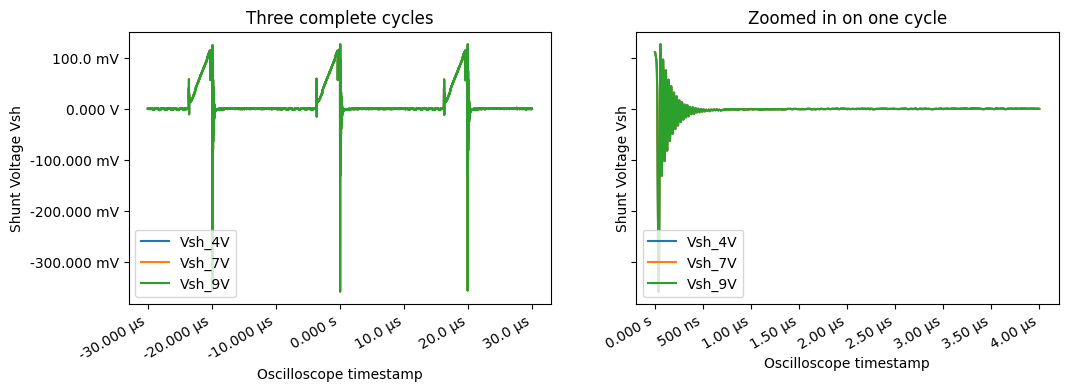

In [49]:
# Task 3 csv files: Vshunt and Vdrain
(df_task3_4V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vsh_4V", ch2 = "Vd_4V")
(df_task3_7V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vsh_7V", ch2 = "Vd_7V")
(df_task3_9V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vsh_9V", ch2 = "Vd_9V")

# Task 4 csv files: Vgdr and Vg
(df_task4_4V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vgdr_4V", ch2 = "Vg_4V")
(df_task4_7V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vgdr_7V", ch2 = "Vg_7V")
(df_task4_9V, tspan, tstep) = helper.read_rigol_csv("Task3_4Vout.csv", ch1 = "Vgdr_9V", ch2 = "Vg_9V")

# Combine all variables into one for convenience
df = df_task3_4V.set_index("t").join([df_task3_7V.set_index("t"), df_task3_9V.set_index("t"), df_task4_4V.set_index("t"), df_task4_7V.set_index("t"), df_task4_9V.set_index("t")]).reset_index()

# Vshunt
df_envelope = df
df_zoom = df[(df["t"] > 0) & (df["t"] < 4e-6)]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (12, 4))
fig.autofmt_xdate()
helper.axes_labels("Oscilloscope timestamp", "s", "Shunt Voltage Vsh", "V", title = "Three complete cycles", ax = ax1)
ax1.plot(df_envelope["t"], df_envelope["Vsh_4V"], label = "Vsh_4V")
ax1.plot(df_envelope["t"], df_envelope["Vsh_7V"], label = "Vsh_7V")
ax1.plot(df_envelope["t"], df_envelope["Vsh_9V"], label = "Vsh_9V")
ax1.legend(loc = "lower left")

helper.axes_labels("Oscilloscope timestamp", "s", "Shunt Voltage Vsh", "V", title = "Zoomed in on one cycle", ax = ax2)
ax2.plot(df_zoom["t"], df_zoom["Vsh_4V"], label = "Vsh_4V")
ax2.plot(df_zoom["t"], df_zoom["Vsh_7V"], label = "Vsh_7V")
ax2.plot(df_zoom["t"], df_zoom["Vsh_9V"], label = "Vsh_9V")
ax2.legend(loc = "lower left")
